<a href="https://colab.research.google.com/github/mittal105/EDA-on-GlobalTerrorism/blob/main/Global_Terrorism_Analysis_Capstone_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [51]:
# importing the useful library modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px


In [3]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
path ='/content/drive/MyDrive/EDA on GlobalTerrorism/'

In [7]:
from pandas.io.formats.info import DataFrameInfoPrinter
# Loading the Dataset that we will use for our analysis
df = pd.read_csv(path + 'Copy of Global Terrorism Data.csv' , encoding = 'latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



In [8]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [9]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [11]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.columns.value_counts()

eventid             1
weaptype2           1
nkillus             1
nkill               1
weapdetail          1
                   ..
target1             1
corp1               1
targsubtype1_txt    1
targsubtype1        1
related             1
Length: 135, dtype: int64

In [13]:
print(list(df))

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [40]:
#  df.columns = df.columns.to_series().apply(lambda x: x.strip())

**since there are 135 columns ,contains huge amount of data ,we rename some columns for better understanding and extract only those columns which we use in our analysis.** 






In [39]:
df.rename(columns={'iyear': 'Year','imonth' :'Month', 'iday':'Day','country_txt':'Country','region_txt':'Region','provstate': 'State','attacktype1_txt': 'AttackType','motive': 'Motive','target1':'Target','nkill': 'Killed', 'nwound':'Wounded','gname':'Group','summary': 'Summary','weaptype1_txt':'Weapon_type','targtype1_txt':'Target_type'} ,inplace= True)

In [33]:
df=df[['Year','Month','Day','Country','Region','State','AttackType','Motive','Target','Killed','Wounded','Group','Summary','Weapon_type','Target_type']]

In [29]:
df.head()

,Year,Month,Day,Country,Region,State,AttackType,Motive,Target,Killed,Wounded,Group,Summary,Weapon_type,Target_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Assassination,NaN,Julio Guzman,1.0,0.0,MANO-D,NaN,Unknown,Private Citizens & Property
1,1970,0,0,Mexico,North America,Federal,Hostage Taking (Kidnapping),NaN,"Nadine Chaval, daughter",0.0,0.0,23rd of September Communist League,NaN,Unknown,Government (Diplomatic)
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Assassination,NaN,Employee,1.0,0.0,Unknown,NaN,Unknown,Journalists & Media
3,1970,1,0,Greece,Western Europe,Attica,Bombing/Explosion,NaN,U.S. Embassy,NaN,NaN,Unknown,NaN,Explosives,Government (Diplomatic)
4,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,NaN,U.S. Consulate,NaN,NaN,Unknown,NaN,Incendiary,Government (Diplomatic)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac71530890>,
      dtype=object)

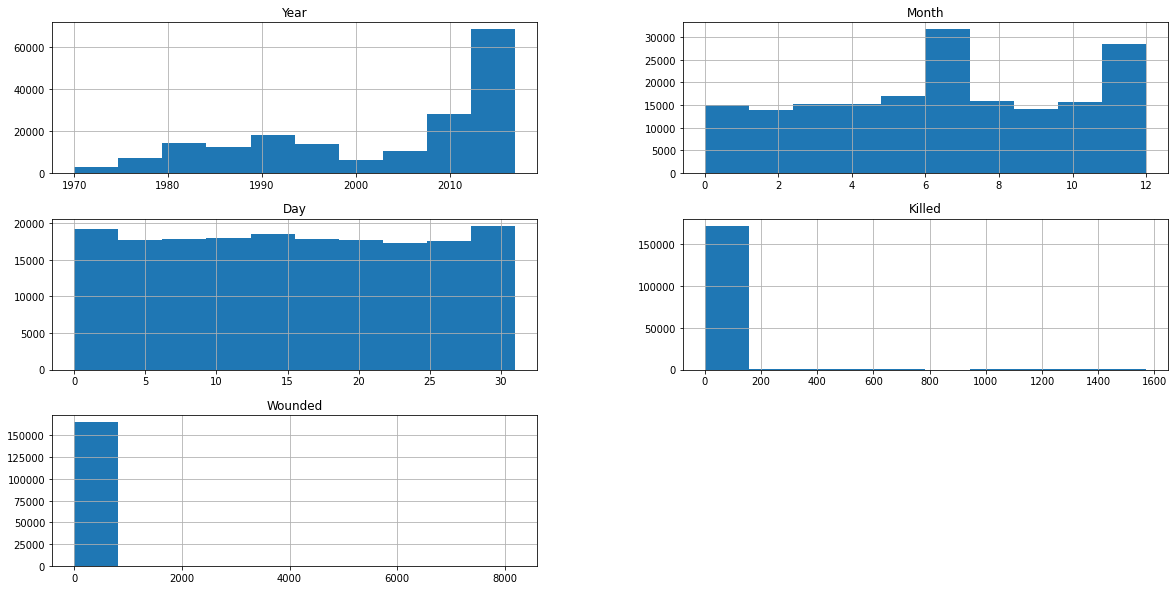

In [30]:
# This represents the distribution of data on each series in the  dataframe
df.hist(figsize=(20,10))

In [34]:
df.describe()

,Year,Month,Day,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,2.403272,3.167668
std,13.259430,3.388303,8.814045,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


# **Correlation Plot**




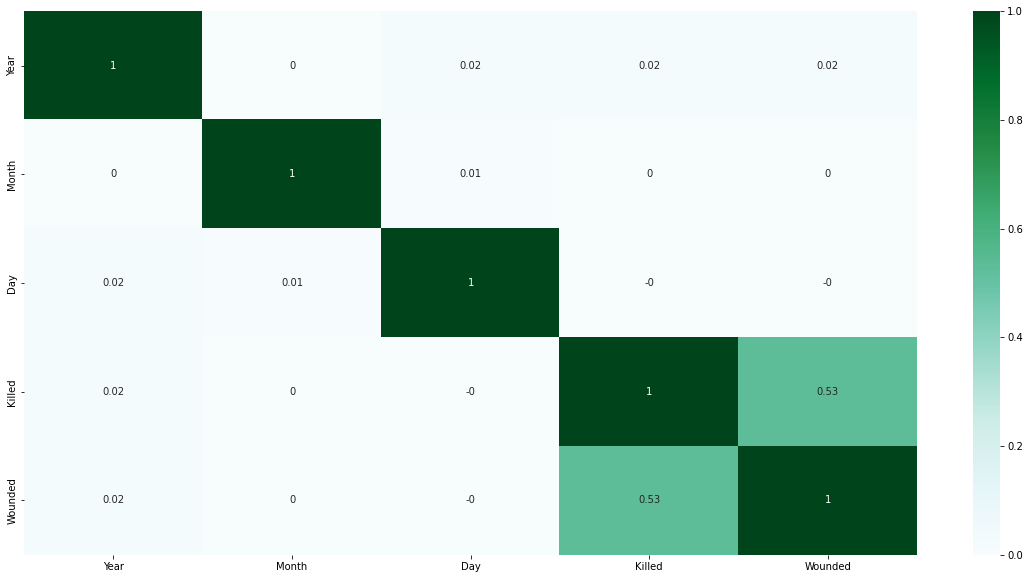

In [44]:

plt.figure(figsize=(20,10))

sns.heatmap(np.round(df.corr(),2),annot= True,cmap='BuGn')

# Terrorist Activities by Region in each year

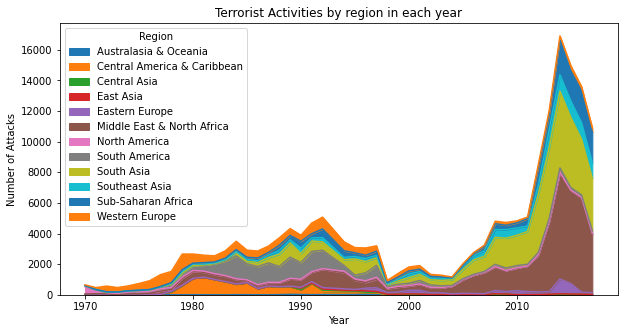

In [57]:
pd.crosstab(df.Year,df.Region).plot(kind='area',figsize=(10,5))
plt.title('Terrorist Activities by region in each year')
plt.ylabel('Number of Attacks')
plt.show()